In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set()

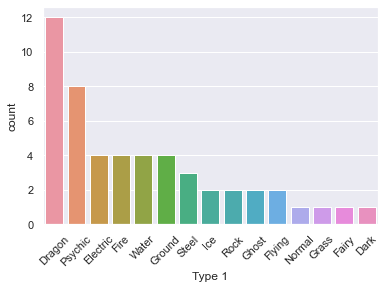

In [3]:
df = pd.read_csv('pokemon_data.csv')
legendary_df = df[df['Legendary'] == True]
plt.figure()
sns.countplot(data = legendary_df, x = 'Type 1', order = legendary_df['Type 1'].value_counts().index)
plt.xticks(rotation = 45);

In [4]:
pkmn_gens_i_vi = pd.read_csv('pokemon_data.csv')
pkmn_gens_vii_viii = pd.read_csv('pokemon-data-gens-vii-viii.csv')

In [5]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,height (m),weight (kg)
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False,0.7,6.9
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False,1.0,13.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False,2.0,100.0
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,False,2.4,155.5
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False,0.6,8.5


In [6]:
pkmn_gens_vii_viii.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,722,Rowlet,Grass,Flying,68,55,55,50,50,42,7,False,False
1,723,Dartrix,Grass,Flying,78,75,75,70,70,52,7,False,False
2,724,Decidueye,Grass,Ghost,78,107,75,100,100,70,7,False,False
3,725,Litten,Fire,NaN,45,65,40,60,40,70,7,False,False
4,726,Torracat,Fire,NaN,65,85,50,80,50,90,7,False,False


In [7]:
print(pkmn_gens_i_vi.describe())

                #          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   71.902500   
std    208.343798   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    184.750000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    364.500000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    539.250000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    721.000000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  height (m)  weight (kg)  
count  800.000000   800.00000  800.000000   800.000000  
mean    68.277500     3.32375    1.236250    64.412625  
std     29.060474     1.66129    1.209789   108.284173  
min      5.000000     1.00000    0.100000 

In [8]:
print(pkmn_gens_i_vi.groupby('Legendary').size())
print('')
print(pkmn_gens_i_vi.groupby('Mythical').size())

Legendary
False    749
True      51
dtype: int64

Mythical
False    776
True      24
dtype: int64


In [9]:
# sns.pairplot(pkmn_gens_i_vi.iloc[0:,4:11], hue = 'Generation', palette = 'deep');

In [10]:
stat_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pkmn_gens_i_vi['Base Stat Total'] = pkmn_gens_i_vi.iloc[:,4:10].sum(axis = 1)
pkmn_gens_vii_viii['Base Stat Total'] = pkmn_gens_vii_viii.iloc[:,4:10].sum(axis = 1)

In [11]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,height (m),weight (kg),Base Stat Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,False,0.7,6.9,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,False,1.0,13.0,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,False,2.0,100.0,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,False,2.4,155.5,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,False,0.6,8.5,309


In [12]:
pkmn_gens_vii_viii.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical,Base Stat Total
0,722,Rowlet,Grass,Flying,68,55,55,50,50,42,7,False,False,320
1,723,Dartrix,Grass,Flying,78,75,75,70,70,52,7,False,False,420
2,724,Decidueye,Grass,Ghost,78,107,75,100,100,70,7,False,False,530
3,725,Litten,Fire,NaN,45,65,40,60,40,70,7,False,False,320
4,726,Torracat,Fire,NaN,65,85,50,80,50,90,7,False,False,420


In [13]:
new_order = list(pkmn_gens_i_vi.columns[0:4]) + ['Base Stat Total'] + stat_cols + list(pkmn_gens_i_vi.columns[10:-3])
pkmn_gens_i_vi = pkmn_gens_i_vi[new_order]
pkmn_gens_vii_viii = pkmn_gens_vii_viii[new_order]

In [14]:
pkmn_gens_i_vi.head()

,#,Name,Type 1,Type 2,Base Stat Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mythical
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False


In [15]:
# from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [16]:
X1 = pkmn_gens_i_vi[['#', 'Base Stat Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
Y1 = pkmn_gens_i_vi['Legendary']

X2 = pkmn_gens_vii_viii[['#', 'Base Stat Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
Y2 = pkmn_gens_vii_viii['Legendary']

In [17]:
model = GaussianNB()
model.fit(X1, Y1)
test = model.predict(X2) == np.array(Y2)

In [18]:
hist = np.histogram(test)
hist[0][-1]/(hist[0][-1] + hist[0][0])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


0.8911917098445595

Check matchup of prediction and actual

In [19]:
table = np.array([np.array(pkmn_gens_vii_viii['#']), np.array(pkmn_gens_vii_viii['Name']), model.predict(X2), np.array(Y2)]).transpose()

In [ ]:
table